In [ ]:
import sys
sys.path.insert(0, "../")

In [101]:
import jax_md
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

In [102]:
from fab.utils.plotting import plot_contours_2D

In [103]:
displacement_fn, shift_fn = jax_md.space.free()

In [104]:
displacement_fn(jnp.array([3.0, 3.0, -5.0]), jnp.array([2.0, 2.0, 5.0]))

DeviceArray([  1.,   1., -10.], dtype=float32)

In [105]:
energy_fn = jax_md.energy.lennard_jones_pair(displacement_fn)

In [106]:
energy_fn(jnp.array([[3.0, 5.0], [-3.0, 1.0]]))

DeviceArray(0., dtype=float32)

In [107]:
energy_fn(jnp.array([[0.0, 0.0], [-0.1, 0.1]]))

DeviceArray(6.2499447e+10, dtype=float32)

In [108]:
energy_fn(jnp.array([[0.0, 0.2], [-0.5, 1.0]]))

DeviceArray(2.3745866, dtype=float32)

In [109]:
def log_prob(x):
    x = x[:, :, None]
    return - jax.vmap(energy_fn)(x)

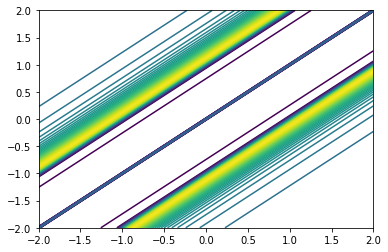

In [111]:
plot_contours_2D(lambda x: jnp.exp(log_prob(x)), levels=50, bound=2.0)

In [84]:
jnp.zeros((n_points,))[:, None].shape

(100, 1)

In [95]:
n_points = 100
max_ = 10.0
x = jnp.concatenate(
    [jnp.zeros((n_points,))[:, None], 
     jnp.linspace(0.01, max_, n_points)[:, None]], axis=-1)

In [96]:
log_probs = log_prob(x)

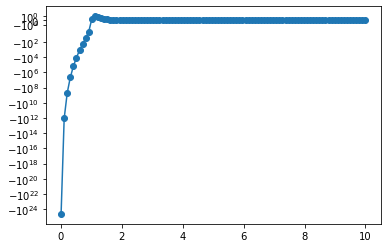

In [97]:
plt.plot(x[:, 1], log_probs, "o-")
plt.yscale("symlog")

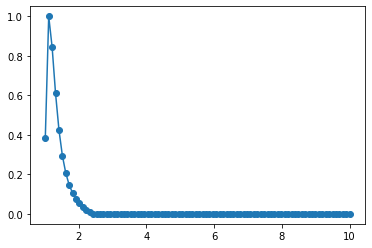

In [100]:
plt.plot(x[10:, 1], log_probs[10:], "o-")

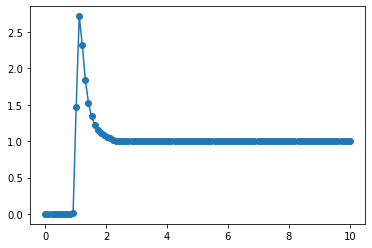

In [98]:
plt.plot(x[:, 1], jnp.exp(log_probs), "o-")